# Konwolucyjne sieci neuronowe

## Convolution neural networks, CNN

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtrowanie (2D) wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


# Zad

Pobierzmy zbiór danych

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)


2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names

In [3]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
        86.666664], dtype=float32)

In [4]:
X.shape

(1288, 1850)

In [5]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

In [6]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [7]:
# przygotowanie y
y = np_utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
n_classes = y.shape[1]
n_classes

7

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])
print(X_train.shape)

(772, 50, 37, 1)


### skalowanie X

In [10]:
# skalowanie X

X_train = X_train/255
X_test = X_test/255

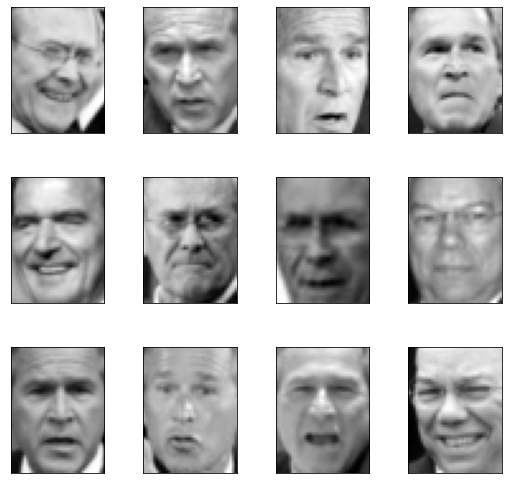

In [11]:
import matplotlib.pyplot as plt

images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(772, 50, 37, 1)
(772, 7)
(516, 50, 37, 1)


# Zad. (Punkt odniesienia)

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwową licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

history_dense_1 = History()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_dense_1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1850)              0         
                                                                 
 dense (Dense)               (None, 7)                 12957     
                                                                 
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 9ms/step - loss: 1.8471 - categorical_accuracy: 0.4007 - val_loss: 1.6851 - val_categorical_accuracy: 0.3782
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.6759 - categorical_accuracy: 0.4318 - val_loss: 1.6479 - val_categorical_accuracy: 0.4145
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5871 - categorical_accuracy: 0.4629 - val_l

19/19 [==============================] - 0s 2ms/step - loss: 0.7445 - categorical_accuracy: 0.7720 - val_loss: 1.0303 - val_categorical_accuracy: 0.6321
Epoch 47/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6822 - categorical_accuracy: 0.7945 - val_loss: 1.0593 - val_categorical_accuracy: 0.6736
Epoch 48/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7560 - categorical_accuracy: 0.7547 - val_loss: 1.0032 - val_categorical_accuracy: 0.6321
Epoch 49/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6523 - categorical_accuracy: 0.8187 - val_loss: 1.0107 - val_categorical_accuracy: 0.6166
Epoch 50/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6690 - categorical_accuracy: 0.8169 - val_loss: 1.1296 - val_categorical_accuracy: 0.5596
Epoch 51/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6612 - categorical_accuracy: 0.7997 - val_loss: 1.0463 - val_categorical_accuracy: 0.6062
Epoch 52/100
19/1

19/19 [==============================] - 0s 2ms/step - loss: 0.4279 - categorical_accuracy: 0.9033 - val_loss: 0.8274 - val_categorical_accuracy: 0.7772
Epoch 96/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4411 - categorical_accuracy: 0.8929 - val_loss: 0.9189 - val_categorical_accuracy: 0.6788
Epoch 97/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4616 - categorical_accuracy: 0.8843 - val_loss: 0.8620 - val_categorical_accuracy: 0.7150
Epoch 98/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4123 - categorical_accuracy: 0.9085 - val_loss: 0.8435 - val_categorical_accuracy: 0.7668
Epoch 99/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4170 - categorical_accuracy: 0.8981 - val_loss: 0.8943 - val_categorical_accuracy: 0.7098
Epoch 100/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4103 - categorical_accuracy: 0.8912 - val_loss: 0.9872 - val_categorical_accuracy: 0.6166


In [14]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.7989 - categorical_accuracy: 0.6977


[0.7988649606704712, 0.6976743936538696]

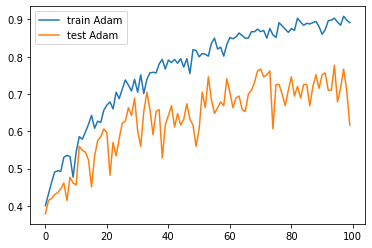

In [16]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "train Adam")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad

Sprawdź czy dwie warstwy poprawią wynik?

In [17]:
history_dense_2 = History()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(300,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_dense_2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1850)              0         
                                                                 
 dense_1 (Dense)             (None, 300)               555300    
                                                                 
 dense_2 (Dense)             (None, 7)                 2107      
                                                                 
Total params: 557,407
Trainable params: 557,407
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 2.0942 - categorical_accuracy: 0.3541 - val_loss: 1.9778 - val_categorical_accuracy: 0.3782
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 1.6424 - categorical_accuracy: 0.4370 - val_loss: 1.7314 - val_categorical

19/19 [==============================] - 0s 4ms/step - loss: 0.4870 - categorical_accuracy: 0.8532 - val_loss: 1.0627 - val_categorical_accuracy: 0.6218
Epoch 46/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5532 - categorical_accuracy: 0.8152 - val_loss: 1.0078 - val_categorical_accuracy: 0.6684
Epoch 47/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5227 - categorical_accuracy: 0.8342 - val_loss: 0.9229 - val_categorical_accuracy: 0.6788
Epoch 48/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5299 - categorical_accuracy: 0.8359 - val_loss: 0.8458 - val_categorical_accuracy: 0.7409
Epoch 49/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4464 - categorical_accuracy: 0.8774 - val_loss: 0.8318 - val_categorical_accuracy: 0.7772
Epoch 50/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4336 - categorical_accuracy: 0.8843 - val_loss: 0.8472 - val_categorical_accuracy: 0.7927
Epoch 51/100
19/1

19/19 [==============================] - 0s 4ms/step - loss: 0.2306 - categorical_accuracy: 0.9344 - val_loss: 0.9276 - val_categorical_accuracy: 0.7409
Epoch 95/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1819 - categorical_accuracy: 0.9585 - val_loss: 0.7997 - val_categorical_accuracy: 0.7824
Epoch 96/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1910 - categorical_accuracy: 0.9603 - val_loss: 0.8643 - val_categorical_accuracy: 0.7876
Epoch 97/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1820 - categorical_accuracy: 0.9585 - val_loss: 0.9027 - val_categorical_accuracy: 0.7720
Epoch 98/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2748 - categorical_accuracy: 0.9016 - val_loss: 0.8589 - val_categorical_accuracy: 0.7409
Epoch 99/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2377 - categorical_accuracy: 0.9240 - val_loss: 0.7926 - val_categorical_accuracy: 0.7979
Epoch 100/100
19/

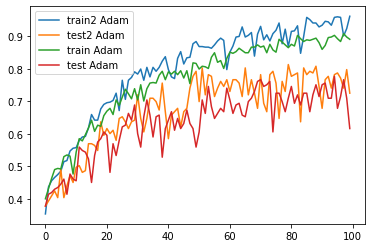

In [19]:
plt.plot(history_dense_2.history['categorical_accuracy'], label = "train2 Adam")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test2 Adam")

plt.plot(history_dense_1.history['categorical_accuracy'], label = "train Adam")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test Adam")


plt.legend()
plt.show()


# Sieci konwolucyjne

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D

In [20]:
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [21]:
history_conv_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_1])
model.evaluate(X_test,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 35, 16)        160       
                                                                 
 flatten_2 (Flatten)         (None, 26880)             0         
                                                                 
 dense_3 (Dense)             (None, 7)                 188167    
                                                                 
Total params: 188,327
Trainable params: 188,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 12ms/step - loss: 2.6806 - categorical_accuracy: 0.3074 - val_loss: 2.7057 - val_categorical_accuracy: 0.1762
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 2.0251 - categorical_accuracy: 0.3575 - val_loss: 1.7955 - val_categorica

19/19 [==============================] - 0s 7ms/step - loss: 0.0453 - categorical_accuracy: 1.0000 - val_loss: 0.9205 - val_categorical_accuracy: 0.7824
Epoch 46/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0419 - categorical_accuracy: 1.0000 - val_loss: 0.9148 - val_categorical_accuracy: 0.7876
Epoch 47/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0370 - categorical_accuracy: 1.0000 - val_loss: 0.9463 - val_categorical_accuracy: 0.7668
Epoch 48/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0337 - categorical_accuracy: 1.0000 - val_loss: 0.9159 - val_categorical_accuracy: 0.7772
Epoch 49/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0364 - categorical_accuracy: 1.0000 - val_loss: 0.9626 - val_categorical_accuracy: 0.7668
Epoch 50/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0313 - categorical_accuracy: 1.0000 - val_loss: 0.9289 - val_categorical_accuracy: 0.7668
Epoch 51/100
19/1

[0.7066322565078735, 0.8062015771865845]

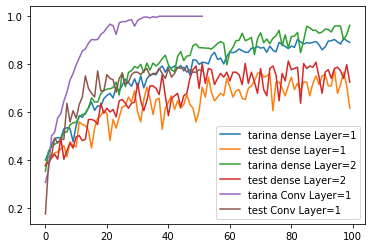

In [26]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D
* MaxPooling2D

In [23]:
history_conv_max_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_1])
model.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 35, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 17, 16)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 6528)              0         
                                                                 
 dense_4 (Dense)             (None, 7)                 45703     
                                                                 
Total params: 45,863
Trainable params: 45,863
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 12ms/step - loss: 1.7014 - categorical_accuracy: 0.4128 - va

19/19 [==============================] - 0s 7ms/step - loss: 0.0795 - categorical_accuracy: 1.0000 - val_loss: 0.7024 - val_categorical_accuracy: 0.7876
Epoch 45/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0790 - categorical_accuracy: 0.9965 - val_loss: 0.6828 - val_categorical_accuracy: 0.7979
Epoch 46/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0772 - categorical_accuracy: 0.9948 - val_loss: 0.7043 - val_categorical_accuracy: 0.8031
Epoch 47/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0746 - categorical_accuracy: 0.9931 - val_loss: 0.6990 - val_categorical_accuracy: 0.7824
Epoch 48/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0768 - categorical_accuracy: 0.9948 - val_loss: 0.6871 - val_categorical_accuracy: 0.7979
Epoch 49/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0790 - categorical_accuracy: 0.9965 - val_loss: 0.7112 - val_categorical_accuracy: 0.7876
Epoch 50/100
19/1

[0.5377321839332581, 0.8430232405662537]

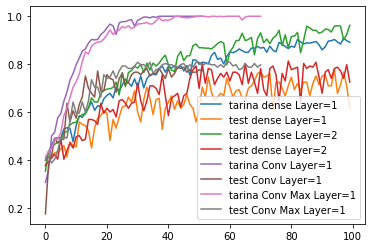

In [25]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Max Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Max Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D

In [28]:
history_conv_max_padding = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_padding])
model.evaluate(X_test,y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 37, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 18, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_5 (Dense)             (None, 7)                 50407     
                                                                 
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 0s 13ms/step - loss: 1.7567 - categorical_accuracy: 0.3851 - va

19/19 [==============================] - 0s 8ms/step - loss: 0.0887 - categorical_accuracy: 0.9965 - val_loss: 0.7711 - val_categorical_accuracy: 0.7927
Epoch 45/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0856 - categorical_accuracy: 1.0000 - val_loss: 0.7742 - val_categorical_accuracy: 0.7979
Epoch 46/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0820 - categorical_accuracy: 0.9931 - val_loss: 0.7258 - val_categorical_accuracy: 0.8187
Epoch 47/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0772 - categorical_accuracy: 0.9965 - val_loss: 0.7254 - val_categorical_accuracy: 0.8135
Epoch 48/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0822 - categorical_accuracy: 0.9965 - val_loss: 0.7343 - val_categorical_accuracy: 0.8083
Epoch 49/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0753 - categorical_accuracy: 0.9914 - val_loss: 0.7671 - val_categorical_accuracy: 0.8083
Epoch 50/100
19/1

[0.5598512887954712, 0.8468992114067078]

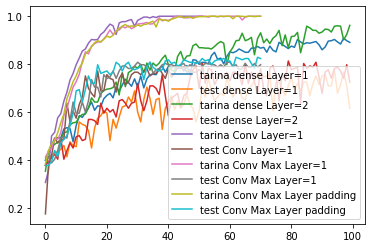

In [29]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Max Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Max Layer=1")

plt.plot(history_conv_max_padding.history['categorical_accuracy'], label = "tarina Conv Max Layer padding")
plt.plot(history_conv_max_padding.history['val_categorical_accuracy'], label = "test Conv Max Layer padding")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D
* Conv2D (,padding="same")
* MaxPooling2D

In [40]:
history_conv_max_2 = History()
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(2,2),padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_2])
model.evaluate(X_test,y_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 50, 37, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 18, 16)        2064      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 9, 16)        0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1728)              0         
                                                                 
 dense_11 (Dense)            (None, 7)               

19/19 [==============================] - 0s 15ms/step - loss: 0.0358 - categorical_accuracy: 0.9983 - val_loss: 0.7249 - val_categorical_accuracy: 0.8238
Epoch 43/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0312 - categorical_accuracy: 1.0000 - val_loss: 0.7494 - val_categorical_accuracy: 0.8083
Epoch 44/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0297 - categorical_accuracy: 0.9983 - val_loss: 0.7578 - val_categorical_accuracy: 0.8187
Epoch 45/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0275 - categorical_accuracy: 0.9983 - val_loss: 0.7811 - val_categorical_accuracy: 0.8031
Epoch 46/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0241 - categorical_accuracy: 1.0000 - val_loss: 0.7560 - val_categorical_accuracy: 0.8083
Epoch 47/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0231 - categorical_accuracy: 1.0000 - val_loss: 0.7881 - val_categorical_accuracy: 0.8187
Epoch 48/10

[0.5752696394920349, 0.8585271239280701]

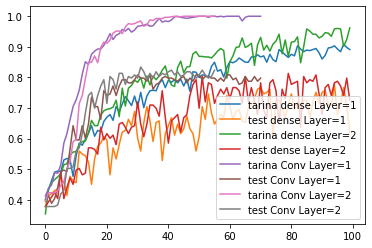

In [41]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_2.history['categorical_accuracy'], label = "tarina Conv Layer=2")
plt.plot(history_conv_max_2.history['val_categorical_accuracy'], label = "test Conv Layer=2")

plt.legend()
plt.show()

# Zad.

Dodaj: 

* BatchNormalization
* Dropout

```python
model.add(layers.Conv2D(64, (3, 3), ...))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
```

* Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).
* Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

In [46]:
history_conv_max_dropout = History()

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:],padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_dropout])
model.evaluate(X_test,y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 50, 37, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 50, 37, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 50, 37, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 18, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 18, 64)        0         
                                                                 
 dense_14 (Dense)            (None, 25, 18, 7)       

ValueError: in user code:

    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Sou\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 25, 18, 7) are incompatible


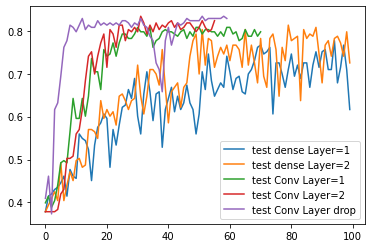

In [44]:
#plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

#plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

#plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

#plt.plot(history_conv_max_2.history['categorical_accuracy'], label = "tarina Conv Layer=2")
plt.plot(history_conv_max_2.history['val_categorical_accuracy'], label = "test Conv Layer=2")

#plt.plot(history_conv_max_dropout.history['categorical_accuracy'], label = "tarina Conv Layer drop")
plt.plot(history_conv_max_dropout.history['val_categorical_accuracy'], label = "test Conv Layer drop")

plt.legend()
plt.show()